<a href="https://colab.research.google.com/github/vsommah/im_dados4_alura/blob/main/im_dados4_alura_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>
      <img alt='Miniatura de uma casa à venda' src="https://cdn-icons.flaticon.com/png/512/4955/premium/4955622.png?token=exp=1653477079~hmac=537aa5a8c0f706d25a6a13a7b80b8639" align="right" height="200" width="200"> <br>
      <h1 align="center">IMERSÃO DADOS 4 - ALURA</h1> <br>
      <h2 align="center">PESQUISA DE IMÓVEIS EM SÃO PAULO</h2> <br>
</p>

# **AULA 02** 📓

## Começando...

In [107]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [108]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [109]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [110]:
dados['Valor'][0]

'R$ 7.000.000'

In [111]:
dados['Valor'][0].split()

['R$', '7.000.000']

In [112]:
dados['Valor'].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [113]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [114]:
dados['Valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [115]:
dados['Valor'].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [116]:
len(dados['Valor'].str.split(expand = True)[1].unique())

1038

In [117]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

# Modificando a df

In [118]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [119]:
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

In [120]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


# Convertendo objetos

In [121]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [122]:
dados_vendas['Valor_anuncio'].str.replace('.', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000
1        3700000
2         380000
3         685000
4         540000
          ...   
10002    1500000
10003     665000
10004    2300000
10005    1050000
10007     270000
Name: Valor_anuncio, Length: 9156, dtype: object

In [123]:
dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0       7,000,000.00
1       3,700,000.00
2         380,000.00
3         685,000.00
4         540,000.00
            ...     
10002   1,500,000.00
10003     665,000.00
10004   2,300,000.00
10005   1,050,000.00
10007     270,000.00
Name: Valor_anuncio, Length: 9156, dtype: float64

In [124]:
dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


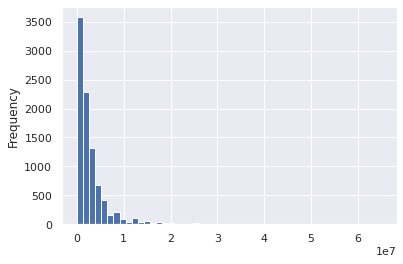

In [126]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins = 50)

## Análise de estatísticas

In [127]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,"9,156.00","9,156.00","9,156.00","9,156.00","9,156.00"
mean,434.42,3.45,3.80,3.96,"3,052,202.96"
std,"7,856.42",1.05,1.97,2.60,"3,944,208.19"
min,10.00,1.00,1.00,1.00,"13,000.00"
25%,168.00,3.00,2.00,2.00,"890,000.00"
50%,276.00,3.00,4.00,4.00,"1,800,000.00"
75%,450.00,4.00,5.00,5.00,"3,500,000.00"
max,"750,000.00",16.00,40.00,50.00,"65,000,000.00"


In [128]:
pd.set_option('display.precision', 2)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,"9,156.00","9,156.00","9,156.00","9,156.00","9,156.00"
mean,434.42,3.45,3.80,3.96,"3,052,202.96"
std,"7,856.42",1.05,1.97,2.60,"3,944,208.19"
min,10.00,1.00,1.00,1.00,"13,000.00"
25%,168.00,3.00,2.00,2.00,"890,000.00"
50%,276.00,3.00,4.00,4.00,"1,800,000.00"
75%,450.00,4.00,5.00,5.00,"3,500,000.00"
max,"750,000.00",16.00,40.00,50.00,"65,000,000.00"


In [129]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [130]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [131]:
dados_vendas[['Rua', 'Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


# Novos Gráficos

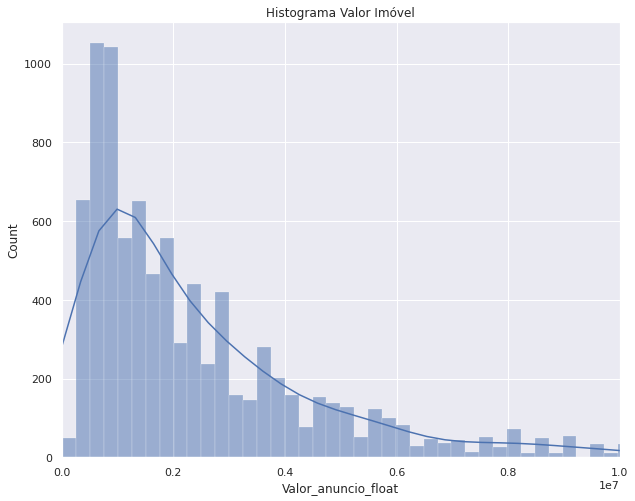

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = 'Valor_anuncio_float', kde = True)
ax.set_title('Histograma Valor Imóvel')
plt.xlim((-50, 10000000))
plt.show()

# Desafio \#01 ✅
Criar uma escala de valores em milhões

In [133]:
# verificando como ficam os dados descritos da df dados_vendas
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [134]:
# utilizando 2 casas decimais e separação de milhares por vírgula
pd.set_option('float_format', '{:,.2f}'.format)

# para caso deseja remover toda formatação de números realizada:
# pd.reset_option('^display.', silent = True)

In [135]:
# criando nova coluna com valores na casa dos milhões
dados_vendas['Valor_milhoes'] = dados_vendas['Valor_anuncio_float']/1000000
dados_vendas.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,"7,000,000.00",7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,"3,700,000.00",3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,"380,000.00",0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,"685,000.00",0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,"540,000.00",0.54
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,"1,980,000.00",1.98
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,None,"850,000.00",0.85
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,R$,450.000,None,"450,000.00",0.45
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900,R$,199.900,None,"199,900.00",0.20
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000,R$,585.000,None,"585,000.00",0.58


# Desafio \#02 ✅
Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

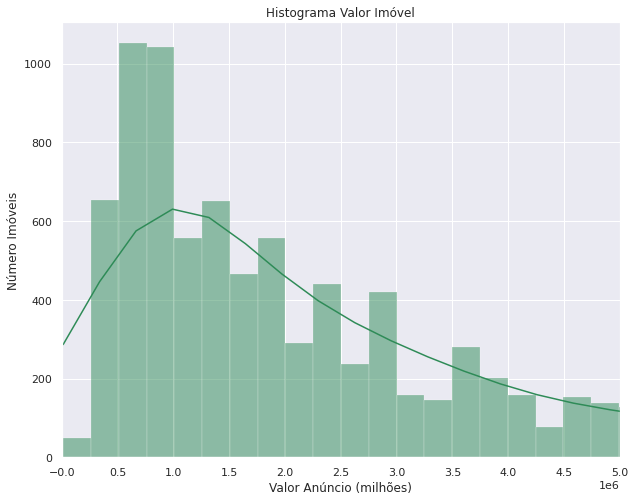

In [136]:
# mudança dos nomes dos eixos x/y
# ajuste da escala para até 5 milhões, com intervalos de 500 mil reais
sns.set()
plt.figure(figsize=(10, 8))
ax=sns.histplot(data=dados_vendas,x ='Valor_anuncio_float', 
                  kde=True, color='seagreen'
                  )
ax.set_title('Histograma Valor Imóvel')
ax.set_xlabel('Valor Anúncio (milhões)')
ax.set_ylabel('Número Imóveis')
plt.xlim((-50, 5000000))
plt.xticks((np.arange(-50, 5000000, 500000)))
plt.show()

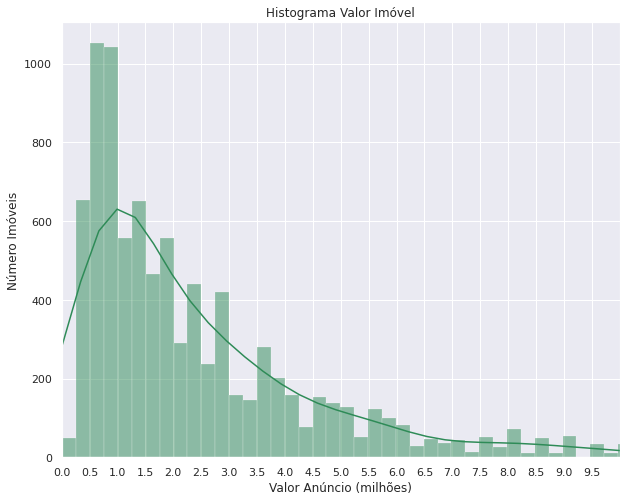

In [137]:
# utilizando agora a nova coluna com valores em milhões
# estabelecendo o limite até 10 milhões com intervalos de 500 mil
sns.set()
plt.figure(figsize=(10, 8))
ax=sns.histplot(data=dados_vendas,x ='Valor_milhoes', 
                  kde=True, color='seagreen'
                  )
ax.set_title('Histograma Valor Imóvel')
ax.set_xlabel('Valor Anúncio (milhões)')
ax.set_ylabel('Número Imóveis')
plt.xlim((0, 10))
plt.xticks((np.arange(0, 10, 0.5)))
plt.show()

In [138]:
# criação de uma nova df com dados de três bairros para análise
dados_vendas_bairro = dados_vendas.loc[(dados_vendas['Bairro'] == 'Vila Mariana') | 
                                (dados_vendas['Bairro'] == 'Alto de Pinheiros') | 
                                (dados_vendas['Bairro'] == 'Planalto Paulista')]

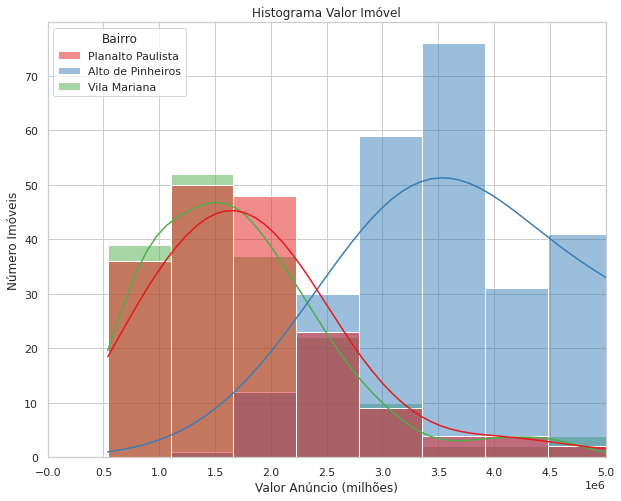

In [139]:
# criação de um histograma com os valores dos imóveis nos bairros selecionados
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax=sns.histplot(
    data=dados_vendas_bairro, x='Valor_anuncio_float', 
    kde=True, hue='Bairro', palette='Set1'
    )
ax.set_title('Histograma Valor Imóvel')
ax.set_xlabel('Valor Anúncio (milhões)')
ax.set_ylabel('Número Imóveis')
plt.xlim((-50, 5000000))
plt.xticks((np.arange(-50, 5000000, 500000)))
plt.show()

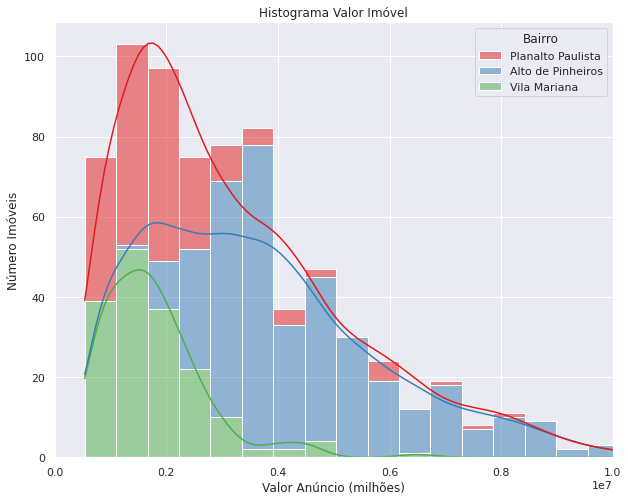

In [141]:
# utilizando a formatação stack para criação de um gráfico novo com a mesma df
sns.set()
plt.figure(figsize=(10, 8))
ax=sns.histplot(
    data=dados_vendas_bairro, x='Valor_anuncio_float', 
    kde=True, hue='Bairro', multiple='stack', palette='Set1'
    )
ax.set_title('Histograma Valor Imóvel')
ax.set_xlabel('Valor Anúncio (milhões)')
ax.set_ylabel('Número Imóveis')
plt.xlim((-50, 10000000))
plt.show()

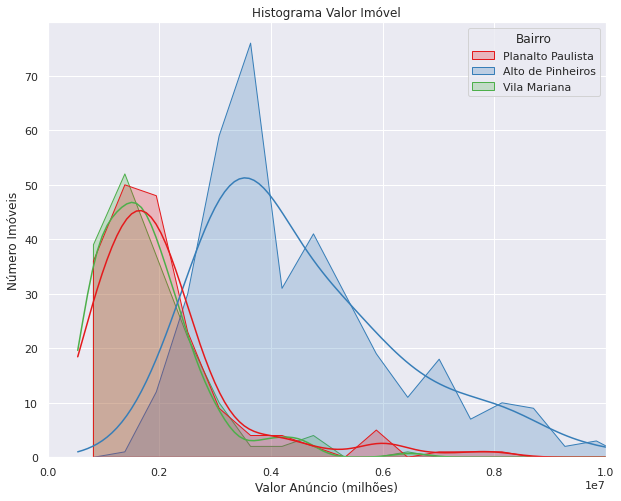

In [142]:
# utilizando a formatação poly para criação de um gráfico novo com a mesma df
sns.set()
plt.figure(figsize=(10, 8))
ax=sns.histplot(
    data=dados_vendas_bairro, x='Valor_anuncio_float', 
    kde=True, hue='Bairro', element='poly', palette='Set1'
    )
ax.set_title('Histograma Valor Imóvel')
ax.set_xlabel('Valor Anúncio (milhões)')
ax.set_ylabel('Número Imóveis')
plt.xlim((-50, 10000000))
plt.show()

# Desafio \#03 ✅
Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [239]:
# Criando uma cópia da df
dados_m2 = dados_vendas.copy()

# Agrupando por Bairros
dados_m2 = dados_m2.groupby(['Bairro']).mean()

# Calculando o valor por m2 e atribuindo o cálculo a uma nova coluna
dados_m2['Valor_M2'] = dados_m2['Valor_anuncio_float']/dados_m2['Metragem']

# Formatando os dados com os quais estamos trabalho em uma df
dados_m2 = pd.DataFrame(dados_m2)
dados_m2.reset_index(inplace=True)

In [240]:
dados_m2

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_milhoes,Valor_M2
0,Aclimação,246.16,3.27,3.04,2.91,"1,763,200.01",1.76,"7,162.69"
1,Alto da Boa Vista,418.88,4.12,5.12,4.62,"2,391,250.00",2.39,"5,708.74"
2,Alto da Lapa,299.25,3.15,3.85,4.00,"2,083,168.75",2.08,"6,961.30"
3,Alto da Mooca,270.05,3.30,2.60,3.65,"1,184,170.00",1.18,"4,385.00"
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,"4,782,698.96",4.78,"11,126.34"
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,152.20,2.60,2.20,2.60,"652,000.00",0.65,"4,283.84"
693,Água Branca,173.58,3.08,3.25,2.25,"1,226,500.00",1.23,"7,065.77"
694,Água Fria,165.42,2.83,3.42,2.50,"927,083.33",0.93,"5,604.53"
695,Água Funda,139.00,3.00,2.50,2.00,"545,000.00",0.55,"3,920.86"


In [241]:
dados_m2.head(30)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_milhoes,Valor_M2
0,Aclimação,246.16,3.27,3.04,2.91,"1,763,200.01",1.76,"7,162.69"
1,Alto da Boa Vista,418.88,4.12,5.12,4.62,"2,391,250.00",2.39,"5,708.74"
2,Alto da Lapa,299.25,3.15,3.85,4.00,"2,083,168.75",2.08,"6,961.30"
3,Alto da Mooca,270.05,3.30,2.60,3.65,"1,184,170.00",1.18,"4,385.00"
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,"4,782,698.96",4.78,"11,126.34"
5,Aricanduva,278.00,3.00,3.00,2.00,"480,000.00",0.48,"1,726.62"
6,Balneário Mar Paulista,250.00,4.00,4.00,10.00,"900,000.00",0.90,"3,600.00"
7,Barra Funda,135.44,2.50,2.39,1.39,"768,666.83",0.77,"5,675.14"
8,Barro Branco (Zona Norte),519.44,3.56,4.11,5.11,"3,162,222.22",3.16,"6,087.70"
9,Bela Aliança,297.22,3.22,4.11,4.11,"2,110,833.33",2.11,"7,101.87"


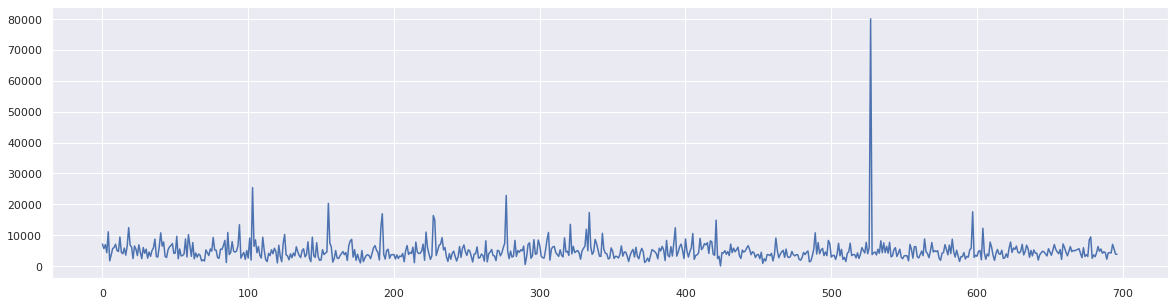

In [242]:
# utilizando um gráfico de linha para verificar se temos dados discrepantes
plt.figure(figsize=(20,5))
dados_m2["Valor_M2"].plot.line()

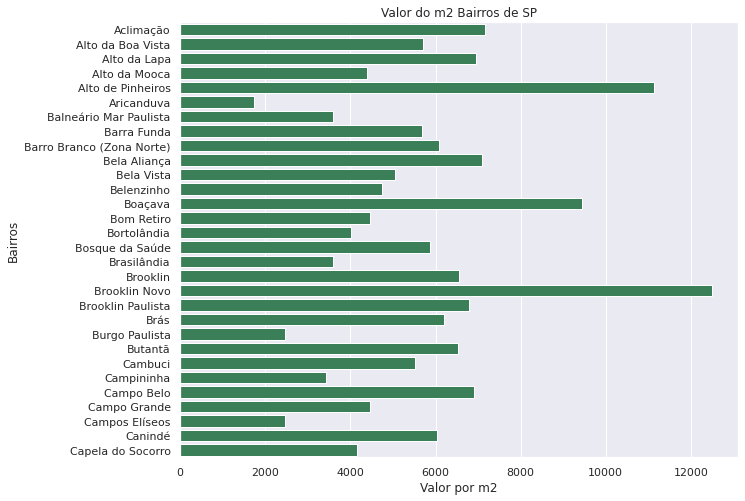

In [247]:
# estabelencendo um gráfico de barras com apenas 30 bairros
sns.set()
plt.figure(figsize=(10, 8))
ax=sns.barplot(data=dados_m2.head(30),x='Valor_M2', y='Bairro', color='seagreen')
ax.set_title('Valor do m2 Bairros de SP')
ax.set_xlabel('Valor por m2')
ax.set_ylabel('Bairros')
plt.show()

# Desafio \#04
Explorar as bibliotecas de visualizações e colocar as suas conclusão

# Desafio \#05
Pesquisar um visualização para analisar os quartis, mediana e outliers